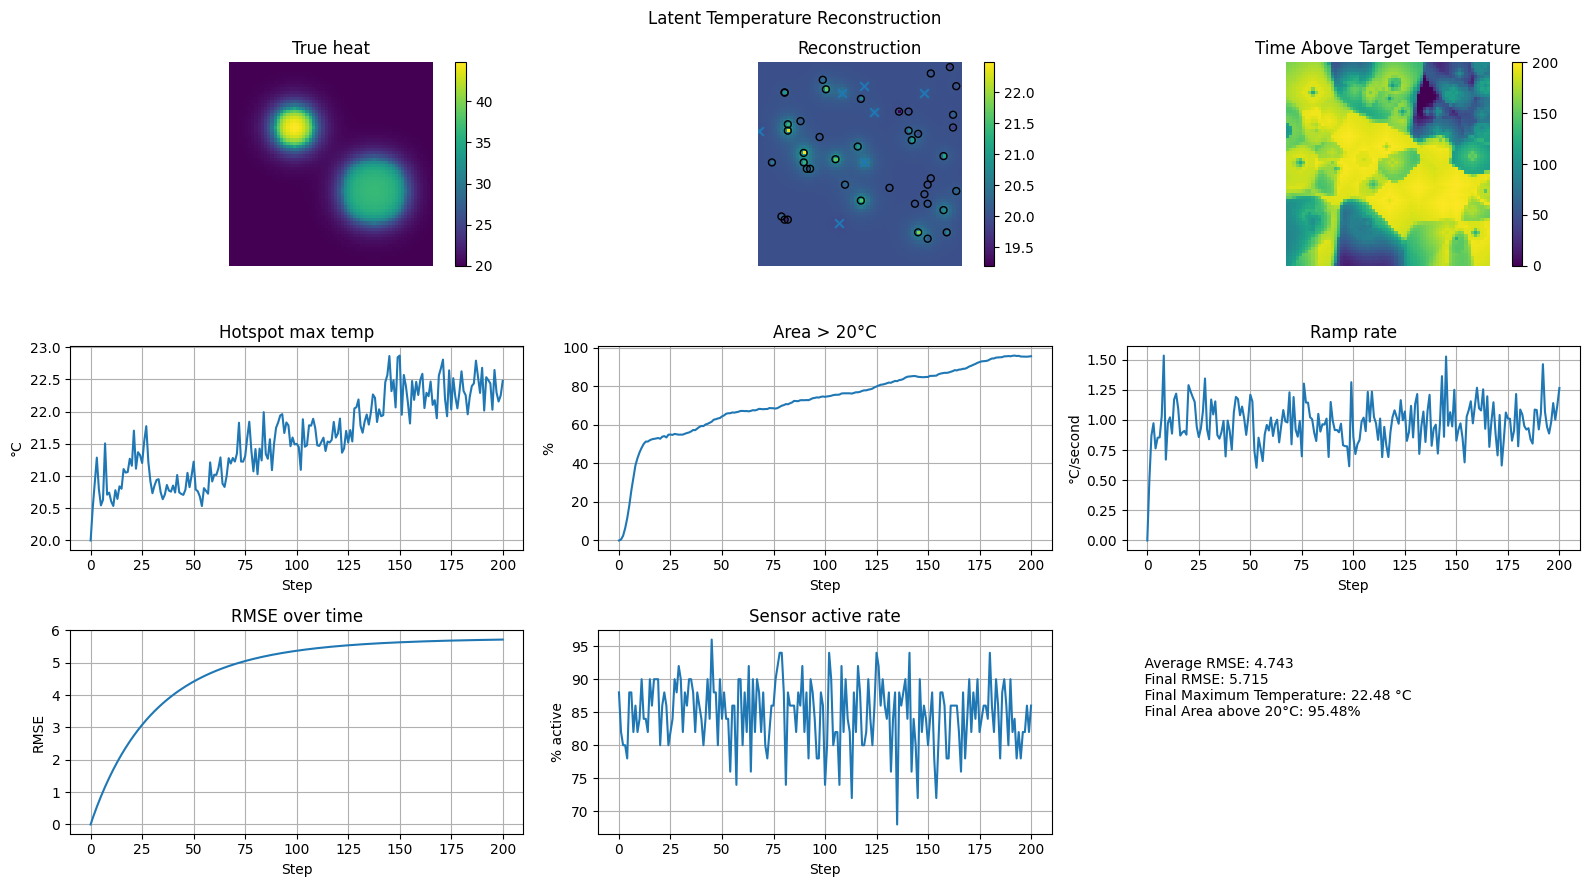

In [1]:
from _03_dashboard import *

if __name__ == "__main__":
    rng = np.random.default_rng(10)
    # since this is a toy simulation, you have to define your own cell_size ratio IRL and time_step ratio IRL
    cell_size = 1 # careful with  exploding gradient in PDE if cellsze <1
    time_step = 1 
    height, width = 64, 64
    total_sensors = 50
    num_steps = 200
    ambient_temp = 20 # temperature outside of the environment
    target_temp = 20 # target tempature inside the enivonrment
    ambient_grid = np.full((height, width), ambient_temp, dtype=np.float64)
    diffusion_rate = 0.1 # how quick heat spreads into cooler regions
    relaxation_rate = 0.01 # how quick heat moves back to ambient temperature, so how quick heat passes past the boundary to open environment
    strength_rate = 0.02 # how quickly the heat source pushes tarwards the environment target temp, like relation but inside environment
    trust_rate = 0.7 # 30% towards PDE prediction and 70% towards sensor reading. 
    hotspots = [(20, 20, 60, 6), (45, 40, 45.0, 10)] # locations of temperature source, x_coords, y_coords, target_temp, radius
    noise_std, sensor_invalid, spike_probabilty, spike_scale = 0.5, 0.15, 0.03, 6

    true_temp = run_sim(ambient_grid, num_steps, ambient_temp, diffusion_rate, relaxation_rate, strength_rate, hotspots, cell_size, time_step) 
    sensor_location = place_sensors(rng, height, width, total_sensors)
    sensor_vals, sensor_mask = create_sensor_outputs(true_temp, sensor_location, (rng, noise_std, sensor_invalid, spike_probabilty, spike_scale))
    recon_temp = reconstruct_temperature_field(ambient_grid, sensor_location, sensor_vals, sensor_mask,
        ambient_temp, diffusion_rate, relaxation_rate, trust_rate, cell_size, time_step)

    dashboard(true_temp, recon_temp, sensor_location, sensor_mask, target_temp, time_step)
    plt.show()
